<a href="https://colab.research.google.com/github/Manjuphoenix/ML_team_buzz/blob/michelle/sam_for_gen_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


## Install Segment Anything Model (SAM) and other dependencies

In [2]:
%cd {HOME}

import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-vl9wuxhr
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-vl9wuxhr
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36589 sha256=aabb75fe222b6fce23647cabbb3f36146011ac919e71e1836a6488cceaf0c3cf
  Stored in directory: /tmp/pip-ephem-wheel-cache-7fpjvhxd/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [3]:
!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 98.7 MB/s eta 0:00:00


### Download SAM weights

In [4]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content
/content/weights


In [5]:
import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

/content/weights/sam_vit_h_4b8939.pth ; exist: True


## Load Model

In [6]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [7]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [ ]:
# Visdrone class labels
# names:
#   0: pedestrian
#   1: people
#   2: bicycle
#   3: car
#   4: van
#   5: truck
#   6: tricycle
#   7: awning-tricycle
#   8: bus
#   9: motor

In [31]:
with open("/content/0000006_00159_d_0000001.txt") as f:
  content = f.readlines()
ped = 0
peo = 0
bic = 0
car = 0
van = 0
tru = 0
tri = 0
awn = 0
bus = 0
mot = 0

for i in range(len(content)):
  content[i] = content[i].replace("\n", "")
  if content[i][-1]=="0":
    ped+=1
    # content[i][-1]="pedestrian"
  elif content[i][-1]=="1":
    peo+=1
    # content[i][-1]="people"
  elif content[i][-1]=="2":
    bic+=1
    # content[i][-1]="bicycle"
  elif content[i][-1]=="3":
    car+=1
    # content[i][-1]="car"
  elif content[i][-1]=="4":
    van+=1
    # content[i][-1]="van"
  elif content[i][-1]=="5":
    tru+=1
    # content[i][-1]="truck"
  elif content[i][-1]=="6":
    tri+=1
    # content[i][-1]="tricycle"
  elif content[i][-1]=="7":
    awn+=1
    # content[i][-1]="awing tricycle"
  elif content[i][-1]=="8":
    bus+=1
    # content[i][-1]="bus"
  elif content[i][-1]=="9":
    mot+=1
    # content[i][-1]="motorcycle"

print(content)
print("Number of objects: ", len(content))
print("Number of Pedestrians: ", ped)
print("Number of People: ", peo)
print("Number of Bicycle: ", bic)
print("Number of Car: ", car)
print("Number of Van: ", van)
print("Number of Truck: ", tru)
print("Number of Tricycle: ", tri)
print("Number of Awning Tricycle: ", awn)
print("Number of Bus: ", bus)
print("Number of Motorcycle: ", mot)
new_list = []

['685,463,110,65,1,4,0,0', '578,328,36,38,1,4,0,0', '617,327,38,44,1,4,0,0', '659,350,90,40,1,4,0,0', '761,346,40,44,1,4,0,0', '805,350,38,41,1,4,0,0', '849,346,45,47,1,4,0,0', '895,349,43,44,1,4,0,0', '886,297,40,43,1,4,0,0', '810,305,70,40,1,4,0,0', '805,256,46,28,1,4,0,0', '783,234,70,27,1,4,0,0', '435,535,134,57,1,4,0,0', '488,507,118,52,1,4,0,1', '495,473,120,46,1,4,0,1', '507,447,107,38,1,4,0,1', '473,422,104,46,1,4,0,1', '913,179,33,31,1,4,0,0', '995,126,39,23,1,4,0,0', '922,106,20,21,1,4,0,0', '862,154,10,17,1,4,0,0', '1217,146,40,21,1,4,0,0', '1134,159,9,22,1,1,0,0', '1060,138,15,19,1,1,0,0', '1038,159,11,17,1,1,0,0', '387,215,144,51,0,11,0,0', '331,149,94,65,1,6,0,0', '296,152,104,65,1,6,0,2', '179,136,107,64,1,6,0,0', '139,138,118,62,1,6,0,2', '79,135,98,52,1,6,0,0', '32,140,92,40,1,6,0,0', '3,138,44,46,1,6,0,1', '0,231,91,89,1,6,1,0', '0,380,55,65,1,4,1,0', '29,393,89,59,1,4,0,1', '99,398,64,38,1,4,0,1', '165,392,58,37,1,4,0,1', '220,400,51,39,1,4,0,1', '315,409,42,19,1,10,

In [32]:
lab0 = "pedestrain"
for i in range(len(content)):
  if content[i][-1]=="0":
    content[i] += (",pedestrian")
    new_list.append(content[i].split(','))
    # new_list += content[i]
print(new_list)
print("Number of pedestrain labels: ", len(new_list))

[['685', '463', '110', '65', '1', '4', '0', '0', 'pedestrian'], ['578', '328', '36', '38', '1', '4', '0', '0', 'pedestrian'], ['617', '327', '38', '44', '1', '4', '0', '0', 'pedestrian'], ['659', '350', '90', '40', '1', '4', '0', '0', 'pedestrian'], ['761', '346', '40', '44', '1', '4', '0', '0', 'pedestrian'], ['805', '350', '38', '41', '1', '4', '0', '0', 'pedestrian'], ['849', '346', '45', '47', '1', '4', '0', '0', 'pedestrian'], ['895', '349', '43', '44', '1', '4', '0', '0', 'pedestrian'], ['886', '297', '40', '43', '1', '4', '0', '0', 'pedestrian'], ['810', '305', '70', '40', '1', '4', '0', '0', 'pedestrian'], ['805', '256', '46', '28', '1', '4', '0', '0', 'pedestrian'], ['783', '234', '70', '27', '1', '4', '0', '0', 'pedestrian'], ['435', '535', '134', '57', '1', '4', '0', '0', 'pedestrian'], ['913', '179', '33', '31', '1', '4', '0', '0', 'pedestrian'], ['995', '126', '39', '23', '1', '4', '0', '0', 'pedestrian'], ['922', '106', '20', '21', '1', '4', '0', '0', 'pedestrian'], ['862

In [33]:
import numpy as np

bbox = []
new_bbox = np.array([])
for i in range(len(new_list)):
  bbox.append(np.array([new_list[i][0], new_list[i][1], new_list[i][2], new_list[i][3]]))
  new_bbox = np.array(bbox)
print(bbox)

[array(['685', '463', '110', '65'], dtype='<U3'), array(['578', '328', '36', '38'], dtype='<U3'), array(['617', '327', '38', '44'], dtype='<U3'), array(['659', '350', '90', '40'], dtype='<U3'), array(['761', '346', '40', '44'], dtype='<U3'), array(['805', '350', '38', '41'], dtype='<U3'), array(['849', '346', '45', '47'], dtype='<U3'), array(['895', '349', '43', '44'], dtype='<U3'), array(['886', '297', '40', '43'], dtype='<U3'), array(['810', '305', '70', '40'], dtype='<U3'), array(['805', '256', '46', '28'], dtype='<U3'), array(['783', '234', '70', '27'], dtype='<U3'), array(['435', '535', '134', '57'], dtype='<U3'), array(['913', '179', '33', '31'], dtype='<U3'), array(['995', '126', '39', '23'], dtype='<U3'), array(['922', '106', '20', '21'], dtype='<U3'), array(['862', '154', '10', '17'], dtype='<U3'), array(['1217', '146', '40', '21'], dtype='<U4'), array(['1134', '159', '9', '22'], dtype='<U4'), array(['1060', '138', '15', '19'], dtype='<U4'), array(['1038', '159', '11', '17'], 

In [34]:
print(len(new_bbox))

57


In [48]:
import numpy as np

# default_box is going to be used if you will not draw any box on image above
default_box = {'x': 68, 'y': 247, 'width': 555, 'height': 678, 'label': ''}

# box = widget.bboxes[0] if widget.bboxes else default_box
# box = np.array([
#     box['x'],
#     box['y'],
#     box['x'] + box['width'],
#     box['y'] + box['height']
# ])
abc = numpy.array(['685', '463', '795', '528'])


In [49]:
import cv2
import numpy as np
import supervision as sv
import numpy

IMAGE_PATH = "/content/0000006_00159_d_0000001.jpg"
mask_predictor = SamPredictor(sam)

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

mask_predictor.set_image(image_rgb)

new_masks = []
print(type(new_masks))

for i in bbox:
  masks, scores, logits = mask_predictor.predict(
    # box=numpy.array(i),
    box = abc,
    multimask_output=True
  )
  # new_masks.append(masks)

<class 'list'>


In [ ]:
print(masks.shape)
print(type(masks))
print(len(new_masks))

import matplotlib.pyplot as plt
plt.imshow(masks)

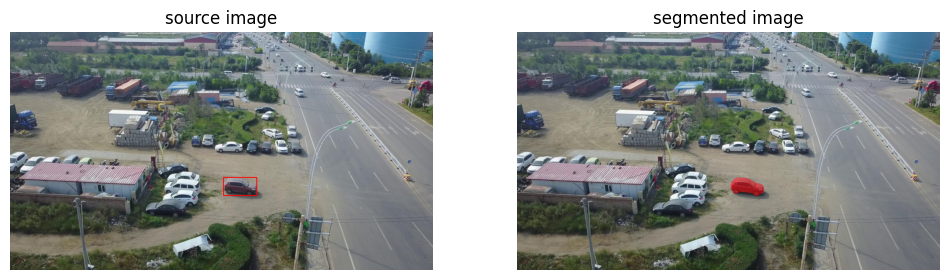

In [50]:
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=masks),
    mask=masks
)
detections = detections[detections.area == np.max(detections.area)]

source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=detections, skip_label=True)
segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[source_image, segmented_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

In [45]:
from google.colab.patches import cv2_imshow

p1 = (685, 463)
p2 = (463, 110)
p3 = (110, 65)
p4 = (65, 685)

color = (0, 255, 0)

image = cv2.line(segmented_image, p1, p2, color, thickness=3)
image = cv2.line(segmented_image, p2, p3, color, thickness=3)
image = cv2.line(segmented_image, p3, p4, color, thickness=3)
image = cv2.line(segmented_image, p4, p1, color, thickness=3)

cv2.imshow("HEY", image)
cv2.waitKey(0)

AttributeError: ignored

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
import supervision as v

sv.plot_images_grid(
    images=masks,
    grid_size=(1, 4),
    size=(16, 4)
)

## Automated Mask Generation

To run automatic mask generation, provide a SAM model to the `SamAutomaticMaskGenerator` class. Set the path below to the SAM checkpoint. Running on CUDA and with the default model is recommended.

In [ ]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [ ]:
import numpy as np
from dataclasses import dataclass
from typing import List, Tuple, Union, Optional
from dataclasses_json import dataclass_json
from supervision import Detections


@dataclass_json
@dataclass
class COCOCategory:
    id: int
    name: str
    supercategory: str


@dataclass_json
@dataclass
class COCOImage:
    id: int
    width: int
    height: int
    file_name: str
    license: int
    date_captured: str
    coco_url: Optional[str] = None
    flickr_url: Optional[str] = None


@dataclass_json
@dataclass
class COCOAnnotation:
    id: int
    image_id: int
    category_id: int
    segmentation: List[List[float]]
    area: float
    bbox: Tuple[float, float, float, float]
    iscrowd: int


@dataclass_json
@dataclass
class COCOLicense:
    id: int
    name: str
    url: str


@dataclass_json
@dataclass
class COCOJson:
    images: List[COCOImage]
    annotations: List[COCOAnnotation]
    categories: List[COCOCategory]
    licenses: List[COCOLicense]


def load_coco_json(json_file: str) -> COCOJson:
    import json

    with open(json_file, "r") as f:
        json_data = json.load(f)

    return COCOJson.from_dict(json_data)


class COCOJsonUtility:
    @staticmethod
    def get_annotations_by_image_id(coco_data: COCOJson, image_id: int) -> List[COCOAnnotation]:
        return [annotation for annotation in coco_data.annotations if annotation.image_id == image_id]

    @staticmethod
    def get_annotations_by_image_path(coco_data: COCOJson, image_path: str) -> Optional[List[COCOAnnotation]]:
        image = COCOJsonUtility.get_image_by_path(coco_data, image_path)
        if image:
            return COCOJsonUtility.get_annotations_by_image_id(coco_data, image.id)
        else:
            return None

    @staticmethod
    def get_image_by_path(coco_data: COCOJson, image_path: str) -> Optional[COCOImage]:
        for image in coco_data.images:
            if image.file_name == image_path:
                return image
        return None

    @staticmethod
    def annotations2detections(annotations: List[COCOAnnotation]) -> Detections:
        class_id, xyxy = [], []

        for annotation in annotations:
            x_min, y_min, width, height = annotation.bbox
            class_id.append(annotation.category_id)
            xyxy.append([
                x_min,
                y_min,
                x_min + width,
                y_min + height
            ])

        return Detections(
            xyxy=np.array(xyxy, dtype=int),
            class_id=np.array(class_id, dtype=int)
        )

### Download Dataset from Roboflow

In [ ]:
%cd {HOME}

import roboflow
from roboflow import Roboflow

roboflow.login()

rf = Roboflow()

project = rf.workspace("hashira-fhxpj").project("mri-brain-tumor")
dataset = project.version(1).download("coco")

/content
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to MRI-BRAIN-TUMOR-1 in coco:: 100%|██████████| 85/85 [00:00<00:00, 2992.34it/s]


In [ ]:
import os

DATA_SET_SUBDIRECTORY = "test"
ANNOTATIONS_FILE_NAME = "_annotations.coco.json"
IMAGES_DIRECTORY_PATH = os.path.join(dataset.location, DATA_SET_SUBDIRECTORY)
ANNOTATIONS_FILE_PATH = os.path.join(dataset.location, DATA_SET_SUBDIRECTORY, ANNOTATIONS_FILE_NAME)

In [ ]:
coco_data = load_coco_json(json_file=ANNOTATIONS_FILE_PATH)

CLASSES = [
    category.name
    for category
    in coco_data.categories
    if category.supercategory != 'none'
]

IMAGES = [
    image.file_name
    for image
    in coco_data.images
]

In [ ]:
CLASSES

['YES-TUMOR']

### Single Image Bounding Box to Mask

In [ ]:
# set random seed to allow easy reproduction of the experiment

import random
random.seed(10)

In [ ]:
mask_predictor = SamPredictor(sam)

In [ ]:
import cv2
import supervision as sv
from matplotlib import pyplot as plt
from PIL import Image
import PIL



# EXAMPLE_IMAGE_NAME = random.choice(IMAGES)
EXAMPLE_IMAGE_NAME = "Y16_JPG.rf.96e3fc38718c5f64776810040e63363c.jpg"
EXAMPLE_IMAGE_PATH = os.path.join(dataset.location, DATA_SET_SUBDIRECTORY, EXAMPLE_IMAGE_NAME)


print("File name: ", EXAMPLE_IMAGE_NAME)
# load dataset annotations
annotations = COCOJsonUtility.get_annotations_by_image_path(coco_data=coco_data, image_path=EXAMPLE_IMAGE_NAME)
ground_truth = COCOJsonUtility.annotations2detections(annotations=annotations)

# small hack - coco numerate classes from 1, model from 0 + we drop first redundant class from coco json
ground_truth.class_id = ground_truth.class_id - 1

# load image
image_bgr = cv2.imread(EXAMPLE_IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# initiate annotator
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

# annotate ground truth
annotated_frame_ground_truth = box_annotator.annotate(scene=image_bgr.copy(), detections=ground_truth, skip_label=True)

output = []
img_shp = image_rgb.shape
img = np.zeros(img_shp)
# run SAM inference
mask_predictor.set_image(image_rgb)

for i in ground_truth.xyxy:
  masks, scores, logits = mask_predictor.predict(
      box=i,
      multimask_output=True
  )

  detections = sv.Detections(
      xyxy=sv.mask_to_xyxy(masks=masks),
      mask=masks
  )
  # detections = detections[detections.area == np.max(detections.area)]
  detections = detections[detections.area == np.max(detections.area)]
  # output += detections.mask
  print( "masks__________________-------------",detections.mask,)
  print(type(detections))

  # annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

  ################------Old code-----------################
  # annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

  # sv.plot_images_grid(
  #       images=[annotated_frame_ground_truth, annotated_image],
  #       grid_size=(1, 2),
  #       titles=['source image', 'segmented image']
  # )
  ##############----------end----------------###############

  output.append(detections)
  print(len(output))
  print(output[0].mask)

  for j in output:
    annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=j[0:2])
    print(annotated_image.shape, "--------------------")
    img += annotated_image
    img = img.reshape(416,416,1)

    plt.imshow(img)


    sv.plot_images_grid(
          images=[annotated_frame_ground_truth, annotated_image],
          grid_size=(1, 2),
          titles=['source image', 'segmented image']
    )
    print(j[0].mask.shape)
    imgplot = plt.imshow(j[0].mask)

File name:  Y16_JPG.rf.96e3fc38718c5f64776810040e63363c.jpg
masks__________________------------- [[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]]
<class 'supervision.detection.core.Detections'>
1
[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]]
(416, 416, 3) --------------------


ValueError: ignored